Dataset loaded. Shape: (16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None

Missing values per column:
 Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtyp

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


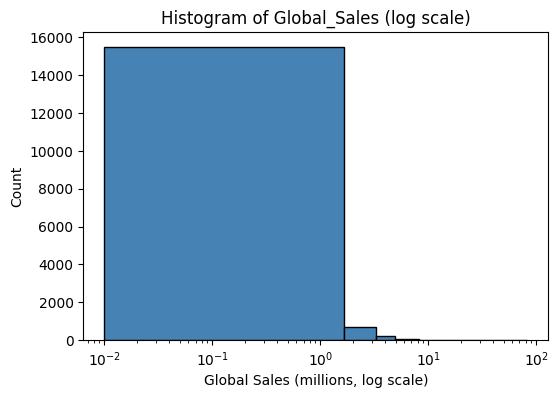

Training set size: (13278, 6)
Testing set size: (3320, 6)

Model training completed.

===== Linear Regression Evaluation =====
RMSE: 1.9534
MAE : 0.5608
R^2 : 0.0918

===== Baseline (Mean Predictor) =====
RMSE: 2.0502
MAE : 0.6175
R^2 : -0.0005


,Platform,Genre,Publisher,Year_filled,name_length,name_word_count,Actual,Predicted
6225,PS2,Action,Activision,2009.0,36,7,0.28,0.785174
14238,PC,Action,Ubisoft,2010.0,37,6,0.03,0.166162
6134,GBA,Action,Activision,2005.0,21,4,0.28,0.490096
2467,PS3,Fighting,Capcom,2012.0,23,4,0.84,0.680729
8753,X360,Action,Konami Digital Entertainment,2014.0,33,6,0.15,0.462271
6463,PS2,Simulation,Ubisoft,2007.0,14,3,0.26,0.585069
2909,XB,Action,Activision,2001.0,18,3,0.70,0.542506
7085,XB,Shooter,Electronic Arts,2003.0,16,2,0.23,0.698449
9039,DS,Racing,Ubisoft,2006.0,19,4,0.14,0.615951
13543,PS3,Adventure,Aqua Plus,2012.0,36,6,0.04,0.199265



Top 10 Features by Absolute Coefficient:


,Feature,Coefficient
403,Publisher_Palcom,2.577895
438,Publisher_Red Orb,2.341630
380,Publisher_Nintendo,2.005386
440,Publisher_RedOctane,1.868296
529,Publisher_UEP Systems,1.830482
83,Publisher_Arena Entertainment,1.668069
556,Publisher_Westwood Studios,1.543144
241,Publisher_HAL Laboratory,-1.353425
469,Publisher_Sony Computer Entertainment Europe,1.311463
7,Platform_GB,1.191709



Saved predictions to vgsales_predictions.csv


In [ ]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load Dataset
df = pd.read_csv(r"C:\Users\Blake Powell\Downloads\vgsales.csv (2)\vgsales.csv")   # Make sure vgsales.csv is in the same directory
print("Dataset loaded. Shape:", df.shape)
display(df.head())

# 2. Basic Information
print("\nData Info:")
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

# 3. Quick EDA
print("\nSummary statistics for numeric columns:")
display(df.describe())

plt.figure(figsize=(6,4))
plt.hist(df['Global_Sales'], bins=50, color='steelblue', edgecolor='black')
plt.xscale('log')
plt.title("Histogram of Global_Sales (log scale)")
plt.xlabel("Global Sales (millions, log scale)")
plt.ylabel("Count")
plt.show()

# 4. Data Cleaning & Feature Engineering

# Fill missing Year values with median year
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
median_year = int(df['Year'].median(skipna=True))
df['Year_filled'] = df['Year'].fillna(median_year)

# Create simple text-based features
df['name_length'] = df['Name'].astype(str).apply(len)
df['name_word_count'] = df['Name'].astype(str).apply(lambda s: len(s.split()))

# Drop rows with missing target
df = df.dropna(subset=['Global_Sales'])

# 5. Select features and target
features = ['Platform', 'Genre', 'Publisher', 'Year_filled', 'name_length', 'name_word_count']
target = 'Global_Sales'

X = df[features]
y = df[target]

# 6. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# 7. Preprocessing Pipeline
numeric_features = ['Year_filled', 'name_length', 'name_word_count']
categorical_features = ['Platform', 'Genre', 'Publisher']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

# 8. Model Setup
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 9. Train Model
model.fit(X_train, y_train)
print("\nModel training completed.")

# 10. Evaluate Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n===== Linear Regression Evaluation =====")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R^2 : {r2:.4f}")

# 11. Baseline Comparison (Mean Predictor)
y_mean = np.full_like(y_test, y_train.mean(), dtype=float)
baseline_mse = mean_squared_error(y_test, y_mean)
baseline_rmse = np.sqrt(baseline_mse)
baseline_mae = mean_absolute_error(y_test, y_mean)
baseline_r2 = r2_score(y_test, y_mean)

print("\n===== Baseline (Mean Predictor) =====")
print(f"RMSE: {baseline_rmse:.4f}")
print(f"MAE : {baseline_mae:.4f}")
print(f"R^2 : {baseline_r2:.4f}")

# 12. Show Predictions vs Actuals
results = X_test.copy()
results['Actual'] = y_test
results['Predicted'] = y_pred
display(results.sample(10, random_state=1))

# 13. Coefficient Analysis
ohe = model.named_steps['preprocessor'].named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_features)
all_features = numeric_features + list(ohe_feature_names)

coefs = model.named_steps['regressor'].coef_
coef_df = pd.DataFrame({'Feature': all_features, 'Coefficient': coefs})
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

print("\nTop 10 Features by Absolute Coefficient:")
display(coef_df.head(10))

# 14. Save Predictions
results.to_csv("vgsales_predictions.csv", index=False)
print("\nSaved predictions to vgsales_predictions.csv")

# END OF EXPERIMENT 1



===== Random Forest Evaluation =====
MSE : 0.774960
RMSE: 0.8803
MAE : 0.0427
R^2 : 0.8188


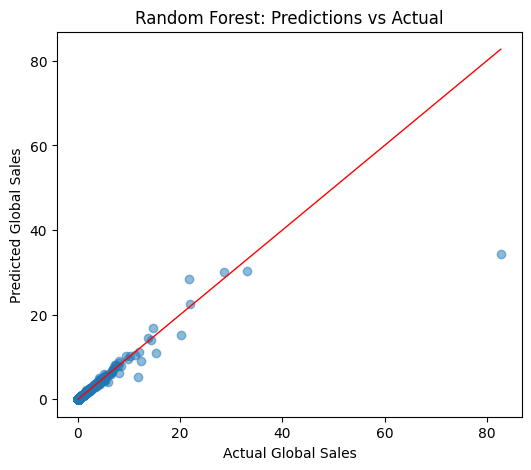

In [ ]:
# --- Experiment 2: Random Forest Regressor (RMSE computed manually) ---
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

# rf_model pipeline (uses same 'preprocessor' defined earlier)
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation metrics (manual RMSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)   # MSE always available
rmse_rf = np.sqrt(mse_rf)                        # manual RMSE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n===== Random Forest Evaluation =====")
print(f"MSE : {mse_rf:.6f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE : {mae_rf:.4f}")
print(f"R^2 : {r2_rf:.4f}")

# Scatter plot
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=1)
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Random Forest: Predictions vs Actual")
plt.show()



===== Ridge Regression Evaluation =====
MSE : 0.000030
RMSE: 0.0055
MAE : 0.0034
R^2 : 1.0000


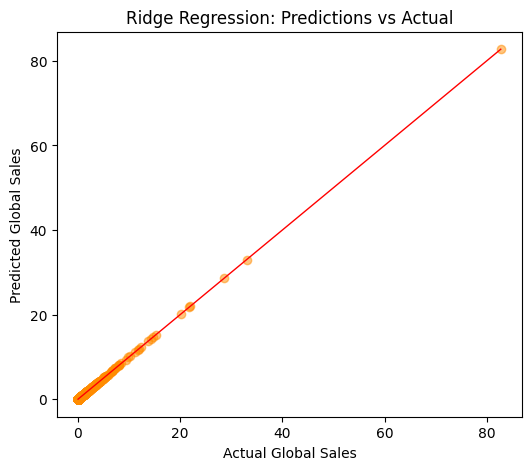

In [ ]:
# --- Experiment 3: Ridge Regression (RMSE computed manually) ---
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0, random_state=42))
])

# Train the model
ridge_model.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluation metrics (manual RMSE)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\n===== Ridge Regression Evaluation =====")
print(f"MSE : {mse_ridge:.6f}")
print(f"RMSE: {rmse_ridge:.4f}")
print(f"MAE : {mae_ridge:.4f}")
print(f"R^2 : {r2_ridge:.4f}")

# Scatter plot
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=1)
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Ridge Regression: Predictions vs Actual")
plt.show()
